In [48]:
%%html
<style>
table {align:left;display:block}
</style>

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Units

Units of measurements are extremely important, especially while comparing with the results of others.

This notebook is devoted to unit conversions.

# Productivity 


| quantile | meaning | units |
| --- | --- | --- |
| GPP | Gross primary productivity | $\mu$mol CO$_2$ m$^{-2}$ s$^{-1}$ |
| AR | Autotrophic (plant) respiration | $\mu$mol CO$_2$ m$^{-2}$ s$^{-1}$ |
| NPP | Net primary productivity | $\mu$mol CO$_2$ m$^{-2}$ s$^{-1}$ |
| DMP | Dry matter productivity | kg DM ha$^{-1}$ day$^{-1}$ |
| AGBP | Aboveground biomass productivity | kg DM ha$^{-1}$ day$^{-1}$ |
| yield | crop yield | kg FW ha$^{-1}$ season$^{-1}$ |


DM - dry matter – CH$_2$O or C$_6$H$_{12}$O$_6$

FW – fresh matter (weight)

NPP = GPP - AR

AR is usually not known and a constant fraction is used (NPP = 0.5 * GPP)

## GPP, NPP, AR

### umol to g C

here chemistry has to be remembered 

1. mol is the quantity of matter that containts 6.02E23 particles
2. molar mass (M) shows how many grams are in one mol ([periodic table](https://ptable.com/#Properties))
3. the numbers in formulae show how many mols of certain element are there
    - CO2 has 1 mol of C (M=12 g mol-1) and 2 mols of O (M = 16 g mol-1)
    - M(CO2) = M(C) + M(O) * 2 = 12 + 16 * 2 = 44 g mol-1
4. **note, we work with micromoles, 1e-6 mol**

In [18]:
gpp_umol = 10 # umol CO2 m-2 s-1

In [19]:
# finish the equation
gpp_gC = gpp_umol * 12 * 1e-6 # g C m-2 s-1
gpp_gC

0.00011999999999999999

### s-1 to day-1

1 day = 24 hours = 24 * 60 minutes = 24 * 60 * 60 seconds


In [20]:
gpp_gC_s = 0.00012  # g C m-2 s-1

In [21]:
gpp_gC_day = gpp_gC_s * 24 * 60 * 60  # g C m-2 day-1
gpp_gC_day

10.368

### m-2 to ha-1

1 ha = 10000 m2 = 1e4 m2

In [25]:
gpp_gC_day_m2 = 10.368  # g C m-2 day-1

In [27]:
gpp_gC_day_ha = gpp_gC_day_m2 * 1e4  # g C ha-1 day-1
gpp_gC_day_ha

103680.0

## DMP

### g C kg DM

DM - dry matter – CH$_2$O (general carbohydrate) or C$_6$H$_{12}$O$_6$ (glucose)

the mass to mass conversion is done through quantity (mols)

1 kg = 1e3 g

In [44]:
gpp_gC_day_ha = 103680  # g C ha-1 day-1
gpp2npp = 0.5
npp_gC_day_ha = gpp_gC_day_ha * gpp2npp  # g C ha-1 day-1
npp_molC_day_ha = npp_gC_day_ha / 12 # mol C ha-1 day-1

In [45]:
dm_molCH2O_day_ha = npp_molC_day_ha / 1 # mol CH2O ha-1 day-1
dm_gCH2O_day_ha = dm_molCH2O_day_ha * M_CH2O
dm_gCH2O_day_ha

129600.0

what if we want to compute it for C$_6$H$_{12}$O$_6$

In [46]:
M_C6H12O6 = ... # g mol-1
M_C6H12O6 = 12*6 + 12 + 16*6 # g mol-1

dm_molC6H12O6_day_ha = npp_molC_day_ha / 6 # mol C6H12O6ha-1 day-1
dm_gC6H12O6_day_ha = dm_molC6H12O6_day_ha * M_C6H12O6
dm_gC6H12O6_day_ha

129600.0

## AGBP

There are many studies that estimate above ground biomass from vegetation indices, RGB images and lidar, but we are talking about AGBP/DMP ratio. 

In other words, crop-specific shoot to total mass ratio, above ground biomass fraction (AGB fraction, f_agb)

As you may expect, this is a dynamic value over the growing season.

The example computations provided here are from 

Baret, F., A. Olioso, and J. L. Luciani. 1992. “Root Biomass Fraction as a Function of Growth Degree Days in Wheat.” Plant and Soil 140 (1): 137–44. https://doi.org/10.1007/BF00012815.

Text(0, 0.5, 'aboveground biomass partitioning fracton')

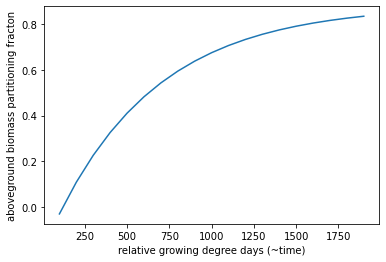

In [57]:
gdd = np.arange(100, 2000, 100)
gdd_e = 120  # gdd at emergence
gdd_s = 1500  # gdd at spiking
gdd_rel = (gdd - gdd_e) / (gdd_s - gdd_e)
f_u = 0.12 + 0.88 * np.exp(-2.28 * gdd_rel)
f_agb = 1 - f_u
plt.plot(gdd, f_agb)

plt.xlabel('relative growing degree days (~time)')
plt.ylabel('aboveground biomass partitioning fracton')

Usually the values of f_agb are taken on annual basis.

Reference values for wheat 0.86, potato 0.2, sugarcane 0.8 presented in Table 2-3 in 

FAO. 2020. WaPOR V2 quality assessment – Technical Report on the Data Quality of the WaPOR FAO Database version 2. Rome.
https://doi.org/10.4060/cb2208en

## yield

0. accumulate DMP over the growing season
1. partition DMP to AGBP (AGB fraction, f_agb) - strictly speaking, a dynamic value but we simplify
2. partitioned AGBP to harvestable material (harvest index, HI)
3. convert dry yield to fresh yield (moisture content of the harvestable product, $\theta$, [g DW g$^{-1}$ FW])

Crop-specific values of HI and $\theta$ are from 

Bastiaanssen, Wim G.M., and Pasquale Steduto. 2017. “The Water Productivity Score (WPS) at Global and Regional Level: Methodology and First Results from Remote Sensing Measurements of Wheat, Rice and Maize.” Science of the Total Environment 575: 595–611. https://doi.org/10.1016/j.scitotenv.2016.09.032.

In [60]:
dmp_season = 100  # kg DM ha-1 season-1

In [61]:
f_agb_wheat = 0.86  # from FAO
hi_wheat = 0.50 # -
theta_wheat = 0.15  # g DW g-1 FW

yield_wheat = dmp_season * f_agb_wheat * hi_wheat / (1 - theta_wheat)
yield_wheat

35.294117647058826

In [64]:
f_agb_maize = 0.90  # guess
hi_maize = 0.55 # -
theta_maize = 0.26  # g DW g-1 FW

yield_maize = ...

Find the reference values of f_agb, HI and water content for the remaining study crops: barley, oat, rapeseed

Some values are available in 
- FAO AquaCrop parameterization https://www.fao.org/fileadmin/user_upload/faowater/docs/AquaCropV40Annexes.pdf
- WaPOR database methodology https://www.fao.org/3/ca9894en/CA9894EN.pdf



# DMP datasets

- Copernicus Global Land Monitoring service https://land.copernicus.eu/global/products/dmp
    - global
    - 333 m (since 2014), 1000 m (since 1999)
    - 10-daily (decadal)
    - Sentinel-3 (earlier Proba-V)
    - LUE model
    - https://notebooks.terrascope.be/ - access to the server for subsetting (otherwise 1 Gb compressed netcdf)
- FAO WaPOR - https://wapor.apps.fao.org/catalog/WAPOR_2/1
    - Africa + Middle East
    - GPP, NPP, ETa
    - 250 m - 100 m - 30 m
    - 10-daily (decadal)
    - MODIS, VIIRS, Landsat, Sentinel-2
    - summary statistics on server
- MODIS MOD17/MYD17 https://lpdaac.usgs.gov/products/mod17a2hv061/
    - global
    - 500 m
    - 8-daily
    - AppEARS subsetting is the most convenient